In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv(r"C:\Users\bmila\IronHack\DAFT_1022\module_3\Lab_3_Data-Cleaning-Challenge\iris-data.csv")
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 5)

In [4]:
iris.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [5]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [7]:
iris.loc[iris['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris.loc[iris['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [8]:
iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [9]:
iris[iris.petal_width_cm.isna()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


       sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
count        50.000000       50.000000        50.000000       45.000000
mean          5.034000        3.418000         1.464000        0.251111
std           0.350865        0.381024         0.173511        0.110005
min           4.400000        2.300000         1.000000        0.100000
25%           4.800000        3.125000         1.400000        0.200000
50%           5.000000        3.400000         1.500000        0.200000
75%           5.200000        3.675000         1.575000        0.300000
max           5.800000        4.400000         1.900000        0.600000
0.2    24
0.4     7
0.3     7
0.1     5
0.5     1
0.6     1
Name: petal_width_cm, dtype: int64


<AxesSubplot:xlabel='class', ylabel='petal_width_cm'>

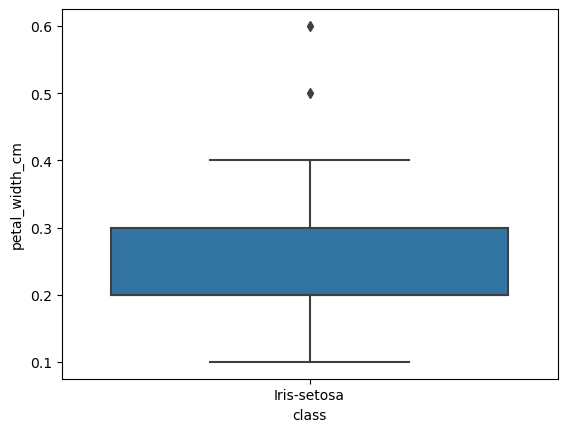

In [10]:
print(iris[iris['class'] == 'Iris-setosa'].describe())
print(iris.loc[iris['class'] == 'Iris-setosa','petal_width_cm'].value_counts())
sns.boxplot(data = iris[iris['class'] == 'Iris-setosa'], x = 'class', y = 'petal_width_cm')


In [12]:
iris.loc[iris['class'] == 'Iris-setosa'].corr()['petal_width_cm']

C:\Users\bmila\AppData\Local\Temp\ipykernel_38188\673922701.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.loc[iris['class'] == 'Iris-setosa'].corr()['petal_width_cm']


sepal_length_cm    0.157609
sepal_width_cm     0.264764
petal_length_cm    0.332553
petal_width_cm     1.000000
Name: petal_width_cm, dtype: float64

In [13]:
from statistics import mode
mode_iris_setosa_petal_width_cm = mode(iris.loc[iris['class'] == 'Iris-setosa','petal_width_cm'])
iris['class'].fillna(mode_iris_setosa_petal_width_cm, inplace=True)

In [15]:
iris.duplicated().value_counts()

False    148
True       2
dtype: int64

In [16]:
iris.loc[iris.duplicated(keep = False) == True]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [17]:
iris.drop_duplicates(inplace=True)

<AxesSubplot:xlabel='sepal_length_cm', ylabel='sepal_width_cm'>

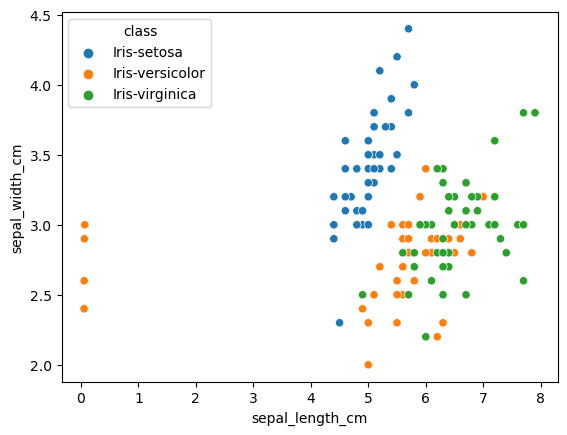

In [18]:
sns.scatterplot(data = iris, x = 'sepal_length_cm', y = 'sepal_width_cm', hue = 'class')

<AxesSubplot:xlabel='sepal_length_cm', ylabel='petal_length_cm'>

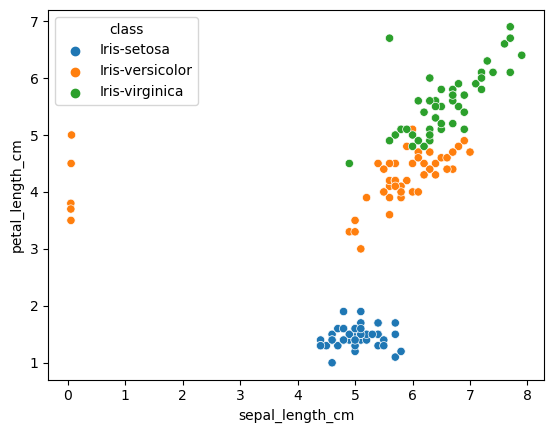

In [19]:
sns.scatterplot(data = iris, x = 'sepal_length_cm', y = 'petal_length_cm', hue = 'class')

<AxesSubplot:xlabel='sepal_length_cm', ylabel='petal_width_cm'>

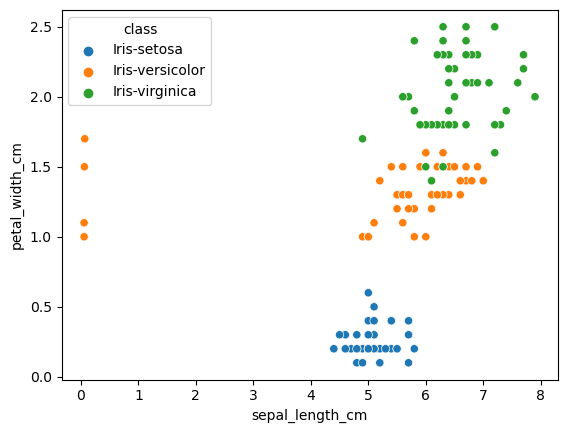

In [20]:
sns.scatterplot(data = iris, x = 'sepal_length_cm', y = 'petal_width_cm', hue = 'class')

<AxesSubplot:xlabel='sepal_width_cm', ylabel='petal_length_cm'>

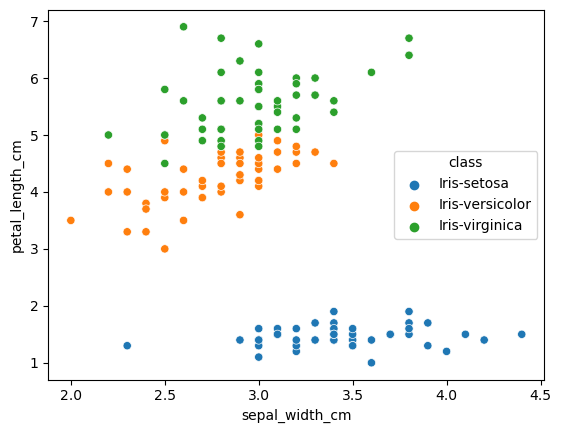

In [21]:
sns.scatterplot(data = iris, x = 'sepal_width_cm', y = 'petal_length_cm', hue = 'class')

<AxesSubplot:xlabel='sepal_width_cm', ylabel='petal_width_cm'>

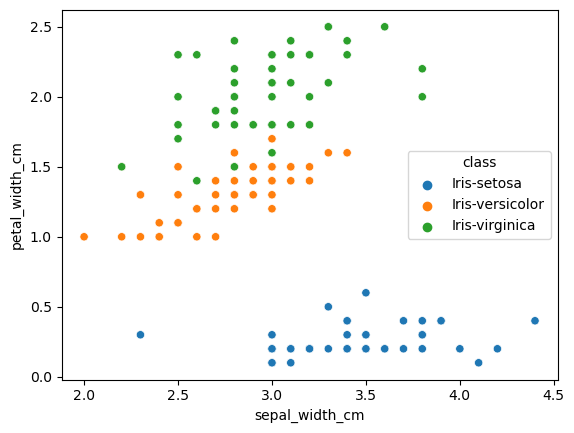

In [22]:
sns.scatterplot(data = iris, x = 'sepal_width_cm', y = 'petal_width_cm', hue = 'class')

<AxesSubplot:xlabel='petal_length_cm', ylabel='petal_width_cm'>

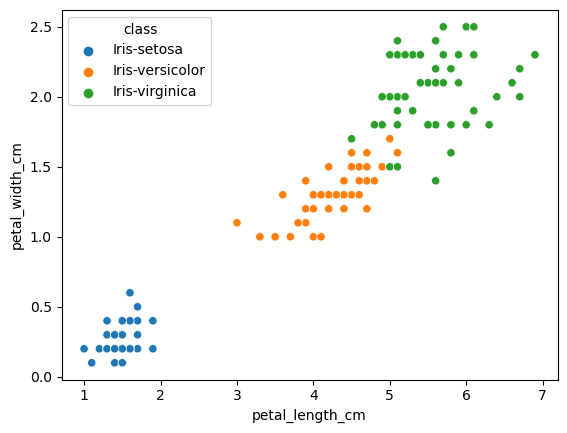

In [23]:
sns.scatterplot(data = iris, x = 'petal_length_cm', y = 'petal_width_cm', hue = 'class')

In [25]:
iris = pd.get_dummies(iris, columns = ['class']).join(iris['class'])
iris.to_csv(r"C:\Users\bmila\IronHack\DAFT_1022\module_3\Lab_3_Data-Cleaning-Challenge\iris-data_clean.csv")